Initial Data Shape: (40949, 16)

First 5 Rows:

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                   

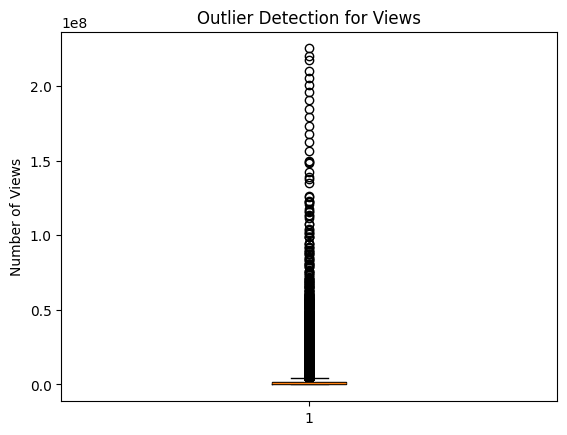


Final Data Shape After Cleaning: (40492, 16)

Data cleaning completed successfully!
Cleaned file saved as: youtube_trending_cleaned.csv


In [1]:
# ================================
# Project 3: Data Cleaning
# Dataset: YouTube Trending Videos
# ================================

# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Load the dataset
# Change the file name if you are using a different country file
df = pd.read_csv("USvideos.csv")

print("Initial Data Shape:", df.shape)
print("\nFirst 5 Rows:\n")
print(df.head())

# 3. Basic dataset information
print("\nDataset Info:\n")
print(df.info())

# 4. Check missing values
print("\nMissing Values Before Cleaning:\n")
print(df.isnull().sum())

# 5. Handle missing values
# Fill missing text data
df['description'] = df['description'].fillna("Unknown")
df['tags'] = df['tags'].fillna("Unknown")

# 6. Remove duplicate records
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

df.drop_duplicates(inplace=True)

# 7. Convert publish_time to datetime format
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# 8. Ensure numeric columns are correct
numeric_columns = ['views', 'likes', 'dislikes', 'comment_count']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 9. Handle missing numeric values (if any)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# 10. Standardize text columns
df['title'] = df['title'].str.lower()
df['channel_title'] = df['channel_title'].str.lower()

# 11. Outlier detection (Views)
plt.boxplot(df['views'])
plt.title("Outlier Detection for Views")
plt.ylabel("Number of Views")
plt.show()

# Remove extreme outliers using 99th percentile
upper_limit = df['views'].quantile(0.99)
df = df[df['views'] <= upper_limit]

# 12. Final dataset shape
print("\nFinal Data Shape After Cleaning:", df.shape)

# 13. Save cleaned dataset
df.to_csv("youtube_trending_cleaned.csv", index=False)

print("\nData cleaning completed successfully!")
print("Cleaned file saved as: youtube_trending_cleaned.csv")
